# Comparing Results from Kernel Density Estimates of Parameters

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Load data for three different approaches to estimating stellar parameters from MCMC simulations.

In [2]:
kde = np.genfromtxt('data/run08_kde_props.txt')
mle = np.genfromtxt('data/run08_mle_props.txt')
med = np.genfromtxt('data/run08_median_props.txt')

Compare KDE and MLE methods. MLE is a kernel density estimate with a constant bandwidth and should provide more detail about the underlying posterior distribution, whereas the KDE is a kernel density estimate with a "rule-of-thumb" determination of the bandwidth (Silverman's rule). They provide a modal estimate for the distributions.

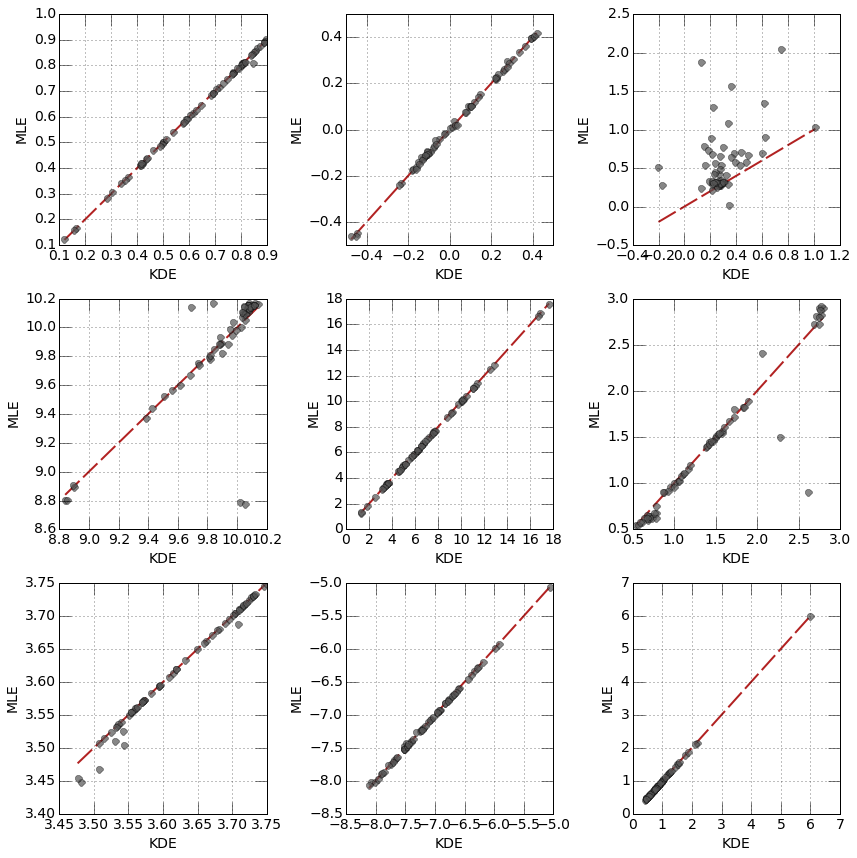

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(12., 12.))

for i in range(9):
    row  = i/3
    col  = i%3
    axis = ax[row, col]
    
    # set axis labels and ranges
    axis.set_xlabel('KDE', fontsize=14.)
    axis.set_ylabel('MLE', fontsize=14.)
    axis.grid(True)
    axis.tick_params(which='major', axis='both', labelsize=14., length=12.)
    
    # 1-to-1 correlation
    axis.plot([min(kde[:, i]), max(kde[:, i])], [min(kde[:, i]), max(kde[:, i])], lw=2, dashes=(20., 5.), c='#b22222')
    axis.plot(kde[:, i], mle[:, i], 'o', markersize=7., c='#555555', alpha=0.7)

fig.tight_layout()

Analysis.

Now, comparing KDE to estimate of distribution median.

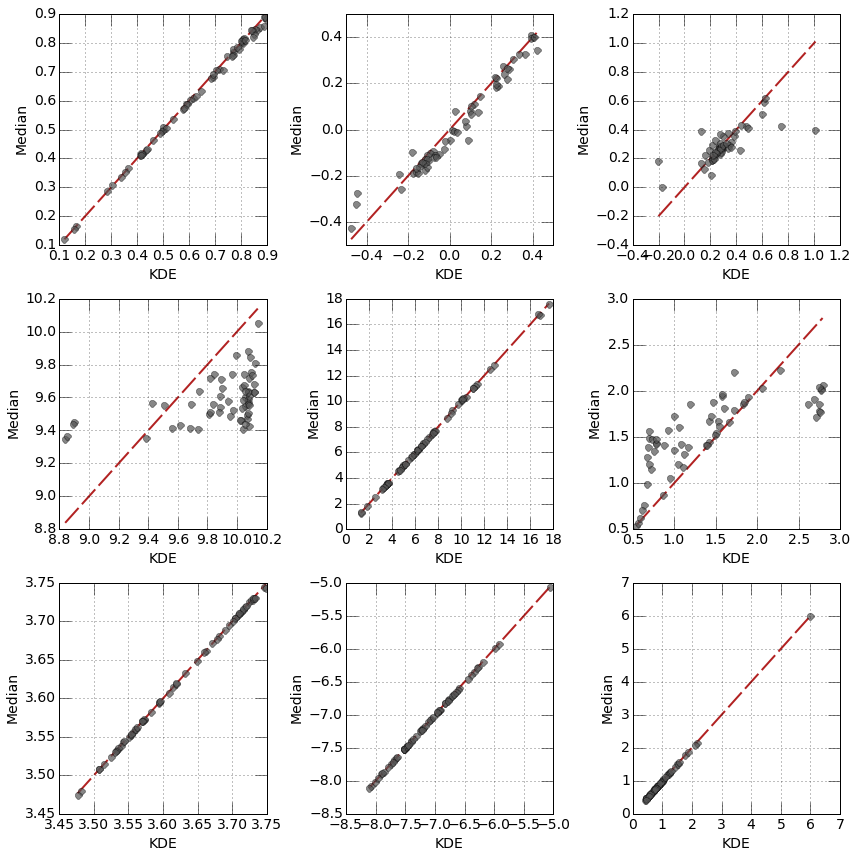

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(12., 12.))

for i in range(9):
    row  = i/3
    col  = i%3
    axis = ax[row, col]
    
    # set axis labels and ranges
    axis.set_xlabel('KDE', fontsize=14.)
    axis.set_ylabel('Median', fontsize=14.)
    axis.grid(True)
    axis.tick_params(which='major', axis='both', labelsize=14., length=12.)
    
    # 1-to-1 correlation
    axis.plot([min(kde[:, i]), max(kde[:, i])], [min(kde[:, i]), max(kde[:, i])], lw=2, dashes=(20., 5.), c='#b22222')
    axis.plot(kde[:, i], med[:, i], 'o', markersize=7., c='#555555', alpha=0.7)
fig.tight_layout()

Analysis.

How does this choice affect the inferred relationship between Teff, [M/H], log(g) and the mixing length parameter?

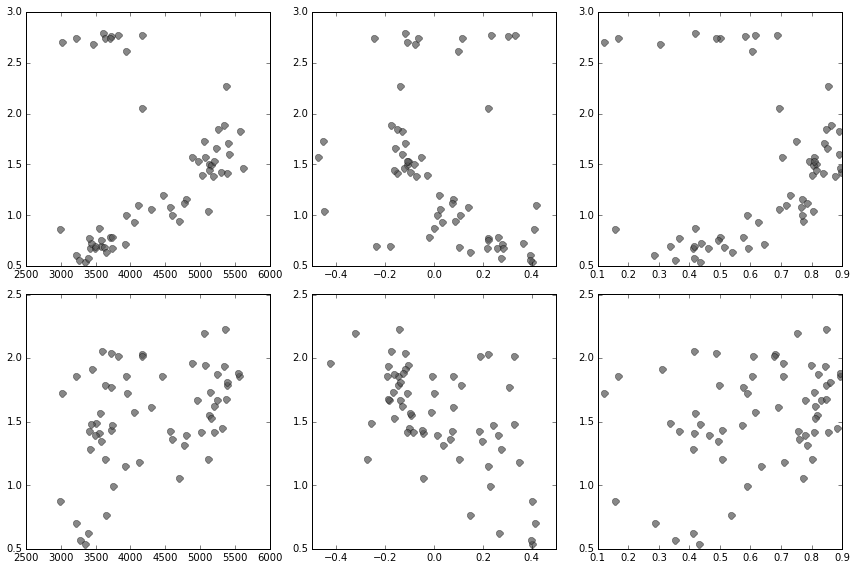

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(12., 8.))

# KDE
ax[0, 0].plot(10**kde[:, 6], kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[0, 1].plot(kde[:, 1], kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[0, 2].plot(kde[:, 0], kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)

# Median
ax[1, 0].plot(10**med[:, 6], med[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[1, 1].plot(med[:, 1], med[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[1, 2].plot(med[:, 0], med[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)

fig.tight_layout()

To permit a better comparison with 3D RHD models, we should isolate stars that have a roughly solar metallicity. Since 3D RHD simluations are only performed at solar metallicity, it may bias the comparison given that we a significantly larger spread in metallicity.

In [6]:
solar_kde = np.array([star for star in kde if -0.1 < star[1] < 0.1])

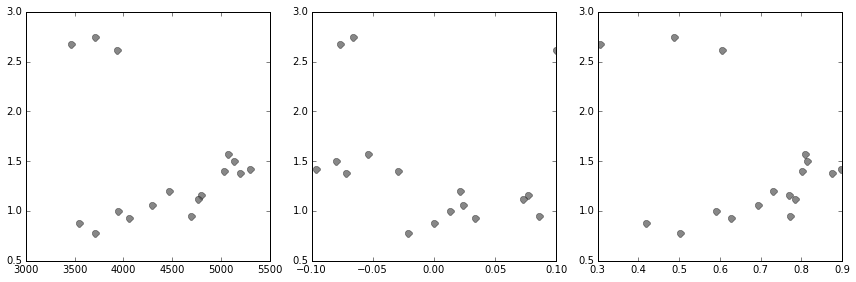

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12., 4.))

# KDE
ax[0].plot(10**solar_kde[:, 6], solar_kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[1].plot(solar_kde[:, 1], solar_kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[2].plot(solar_kde[:, 0], solar_kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)

fig.tight_layout()

Now try only a limited range of effective temperatures to mitigate effects related to the temperature sensitivity of various opacity sources.

In [8]:
warm_kde = np.array([star for star in kde if 5000. <= 10**star[6] <= 6000. and star[1] > -0.35])

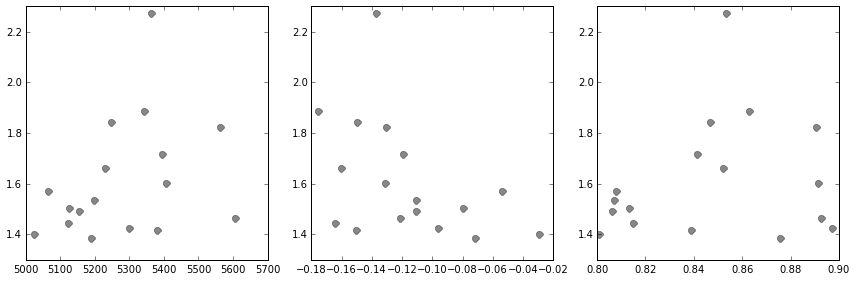

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12., 4.))

# KDE
ax[0].plot(10**warm_kde[:, 6], warm_kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[1].plot(warm_kde[:, 1], warm_kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)
ax[2].plot(warm_kde[:, 0], warm_kde[:, 5], 'o', markersize=7., c='#555555', alpha=0.7)

fig.tight_layout()

This subset is also more comparable to results from Bonaca et al. (2012), who used asteroseismic data to constrain how the convective mixing length parameter changes with stellar properties.

In [10]:
import scipy.stats as stat

Calculate correlation coefficients from Spearman r test.

In [11]:
stat.spearmanr(10**warm_kde[:, 6], warm_kde[:, 5]), stat.spearmanr(warm_kde[:, 1], warm_kde[:, 5]), \
    stat.spearmanr(warm_kde[:, 0], warm_kde[:, 5])

((0.38970588235294118, 0.12203439858783),
 (-0.47794117647058826, 0.052328541890811243),
 (0.17892156862745098, 0.49202096290489161))

We find similar trends of $\alpha$ with stellar parameters as Bonaca et al. However, it should be noted that we find an anti-correlation of $\alpha$ with metallicity, whereas they find a positive correlation coefficient.